## Lab3 - Activity 3 - K-means clustering with Pew Data

### References:
#### 1. Lab3.pdf
#### 2. Kmeans Vignette - http://www.learnbymarketing.com/tutorials/k-means-clustering-in-r-example/
#### 3.  CSV files - https://cran.r-project.org/doc/manuals/R-data.pdf or http://rprogramming.net/read-csv-in-r/
#### 4. Normalization - http://vitalflux.com/data-science-scale-normalize-numeric-data-using-r/
#### 5. ClusPlot - https://stat.ethz.ch/R-manual/R-devel/library/cluster/html/clusplot.default.html

#### Include necessary libraries

In [394]:
install.packages("cluster", dependencies=TRUE, repos='http://cran.rstudio.com/')
library("cluster")
library(cluster)

Installing package into 'C:/Users/Ajay-Pc/Documents/R/win-library/3.3'
(as 'lib' is unspecified)
Warning message:
"package 'cluster' is in use and will not be installed"

#### Read from Database

In [395]:
Gaming<- read.csv(file="June 10-July 12, 2015 - Gaming, Jobs and Broadband - CSV.csv", header=TRUE)
head(Gaming)

ï..psraid,sample,int_date,lang,usr,cregion,state,form,sex,q1,...,ideo,hisp,birth_hisp,race,inc,ql1a,qc1,zipcode,weight,standwt
100006,1,61015,1,S,3,51,1,2,1,...,1,2,NA,1,99,NA,NA,20112,2.258065,0.7209406
100009,1,61015,1,U,3,24,2,2,2,...,3,2,NA,2,6,NA,NA,21239,2.548387,0.8136330
100011,1,61015,1,S,2,39,2,2,1,...,1,2,NA,1,3,NA,NA,44730,1.806452,0.5767525
100039,1,61015,1,S,3,37,2,2,1,...,2,2,NA,1,6,NA,NA,27028,5.032258,1.6066676
100040,1,61015,1,U,3,21,1,2,1,...,1,2,NA,1,3,2,NA,40511,7.161290,2.2864116
100043,1,62215,1,R,2,20,1,2,1,...,3,2,NA,1,8,NA,NA,67601,1.000000,0.3192737


#### Pick 5 columns from the dataset

In [396]:
dataset <- subset(Gaming, select = c(age,sex,race, party,emplnw))
dataset2 <- subset(Gaming, select = c(age,sex,race, party,emplnw))
dataset_norm <- subset(Gaming, select = c(age,sex,race, party,emplnw))
dataset<- na.omit(dataset)
dataset2<- na.omit(dataset2)
dataset_norm<-na.omit(dataset_norm)

#### Create a normalize function

In [397]:
normalize <- function(x) {
      return ((x - min(x)) / (max(x) - min(x)))
}

#### Normalize the columns into a different subset

In [398]:
cols<- sapply(dataset_norm,is.numeric)
cols
dataset_norm[cols] <- as.data.frame(lapply(dataset_norm[cols], normalize))

age    sex   race  party emplnw 
  TRUE   TRUE   TRUE   TRUE   TRUE

#### Perform Kmeans on Normalized data and compare with normal data

In [399]:
kmeans(dataset,3) # without normalizing
kmeans(dataset_norm,3) # with normalizing using min-max function

K-means clustering with 3 clusters of sizes 819, 624, 558

Cluster means:
       age      sex     race    party   emplnw
1 53.94017 1.507937 1.649573 2.540904 2.152625
2 28.92468 1.445513 1.836538 2.721154 2.415064
3 75.34409 1.569892 1.482079 2.575269 4.068100

Clustering vector:
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
   1    1    3    2    3    3    3    3    3    3    3    3    1    3    1    1 
  17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32 
   3    3    3    1    2    3    3    1    3    2    2    3    3    1    3    1 
  33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48 
   2    2    1    1    3    1    1    1    3    3    3    2    3    2    3    3 
  49   50   51   52   53   54   55   56   57   58   59   60   61   62   63   64 
   1    3    2    3    1    3    2    1    1    1    2    1    3    3    3    3 
  65   66   67   68   69   70   71   72   73   74   75   76   77   78 

K-means clustering with 3 clusters of sizes 545, 444, 1012

Cluster means:
        age sex       race     party     emplnw
1 0.5775059   0 0.05000000 0.1846330 0.01924733
2 0.1787343   0 0.13710586 0.2263514 0.01167494
3 0.4431757   1 0.07633399 0.1983696 0.02019642

Clustering vector:
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
   3    3    3    3    3    3    1    1    1    1    3    3    1    3    3    3 
  17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32 
   1    1    3    1    3    1    3    1    1    3    3    3    3    3    3    3 
  33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48 
   2    2    3    3    3    1    3    1    3    3    3    3    1    2    1    3 
  49   50   51   52   53   54   55   56   57   58   59   60   61   62   63   64 
   1    3    3    1    3    3    3    3    1    3    3    3    3    3    1    1 
  65   66   67   68   69   70   71   72   73   74   75   76   77 

In [400]:
kmeans(dataset,5) # without normalizing
kmeans(dataset_norm,5) # with normalizing using min-max function

K-means clustering with 5 clusters of sizes 383, 447, 184, 468, 519

Cluster means:
       age      sex     race    party   emplnw
1 42.40731 1.522193 1.916449 2.616188 2.057441
2 68.74497 1.570470 1.395973 2.534676 3.545861
3 86.68478 1.576087 1.804348 2.701087 4.885870
4 25.99359 1.431624 1.807692 2.752137 2.435897
5 56.22736 1.479769 1.518304 2.497110 2.173410

Clustering vector:
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
   1    2    3    1    2    2    2    2    2    2    3    2    5    2    1    1 
  17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32 
   2    3    2    5    4    3    3    5    2    1    1    3    2    2    2    5 
  33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48 
   4    4    1    1    2    5    5    5    2    3    2    4    2    4    3    2 
  49   50   51   52   53   54   55   56   57   58   59   60   61   62   63   64 
   5    2    1    3    5    2    1    5    5   

K-means clustering with 5 clusters of sizes 507, 986, 37, 375, 96

Cluster means:
        age       sex       race     party      emplnw
1 0.5666350 0.0000000 0.02416174 0.1494083 0.015779093
2 0.4400371 1.0000000 0.05311866 0.1897819 0.019373267
3 0.4531198 0.0000000 0.11148649 0.9527027 0.067843354
4 0.1667160 0.0000000 0.05166667 0.1906667 0.009442177
5 0.4390432 0.2708333 0.80468750 0.3359375 0.030824830

Clustering vector:
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
   2    2    2    2    2    2    1    1    1    1    2    2    1    2    2    2 
  17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32 
   1    1    2    1    2    1    2    1    1    2    2    2    2    2    2    2 
  33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48 
   4    4    2    2    2    1    2    1    2    2    2    2    1    3    1    2 
  49   50   51   52   53   54   55   56   57   58   59   60   61   62   63   64 
 

In [401]:
kmeans(dataset,7) # without normalizing
kmeans(dataset_norm,7) # with normalizing using min-max function

K-means clustering with 7 clusters of sizes 341, 180, 409, 10, 304, 481, 276

Cluster means:
       age      sex     race    party    emplnw
1 46.02053 1.521994 1.979472 2.583578  1.868035
2 86.41111 1.577778 1.733333 2.600000  2.794444
3 69.27384 1.555012 1.361858 2.550122  2.894866
4 67.70000 1.500000 3.000000 4.900000 98.700000
5 33.14145 1.470395 1.746711 2.746711  1.776316
6 57.60499 1.496881 1.461538 2.484407  2.251559
7 22.56522 1.420290 1.869565 2.699275  2.195652

Clustering vector:
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
   1    6    2    1    3    3    3    3    3    3    2    3    6    3    1    1 
  17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32 
   3    2    3    6    5    2    2    6    3    5    5    2    3    6    3    6 
  33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48 
   7    5    1    1    3    6    6    6    3    2    3    7    3    7    2    3 
  49   50   51   

K-means clustering with 7 clusters of sizes 523, 385, 400, 271, 287, 54, 81

Cluster means:
        age sex       race     party     emplnw
1 0.5705214   0 0.02246654 0.1735182 0.01769618
2 0.1674202   0 0.04772727 0.2233766 0.01213888
3 0.4577778   1 0.02593750 0.1471875 0.01586735
4 0.7196939   1 0.06134686 0.1397601 0.02699751
5 0.1586441   1 0.12587108 0.1842334 0.01674607
6 0.4595336   1 0.26157407 0.9467593 0.03647014
7 0.3859168   0 0.71604938 0.3009259 0.02154195

Clustering vector:
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
   3    3    4    3    6    4    1    1    1    1    4    4    1    4    3    3 
  17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32 
   1    1    4    1    5    1    4    1    1    5    5    4    4    3    4    3 
  33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48 
   2    2    3    3    4    1    3    1    6    4    4    5    1    2    1    4 
  49   50   51   5

Observations: 
1. Min-Max Normalization is being carried out before kmeans.
2. As K increases the kmeans improves i.e. betweenss/totalss improves.
3. In this case however, normalization is not needed as the values under consideration give better results even without min-max normalization.

#### Perform Different Normalization 

In [402]:
dataset <- dataset[dataset$age!= 99,]
dataset <- dataset[dataset$age!= 98,]
dataset$age[dataset$age>0 & dataset$age<=20] <- 1
dataset$age[dataset$age>20 & dataset$age<=40] <- 2
dataset$age[dataset$age>40 & dataset$age<=60] <- 3
dataset$age[dataset$age>60 & dataset$age<=80] <- 4
dataset$age[dataset$age>80 & dataset$age<=100] <- 5
dataset <- dataset[dataset$party!= 9,]
dataset <- dataset[dataset$party!= 8,]
dataset <- dataset[dataset$party!=5,]
dataset <- dataset[dataset$party!=4,]
# dataset <- dataset[dataset$race!=9,]
# dataset <- dataset[dataset$race!=8,]
# dataset <- dataset[dataset$race!=6,]
 # dataset <- dataset[dataset$educ2!=98,]
 # dataset <- dataset[dataset$educ2!=99,]
# dataset <- dataset[dataset$inc!=99,]
# dataset <- dataset[dataset$inc!=98,]
dataset <- dataset[dataset$race!=8,]
dataset <- dataset[dataset$race!=9,]
 dataset <- dataset[dataset$emplnw!=98,]
 dataset <- dataset[dataset$emplnw!=99,]

In [403]:
#set.seed(76964057) #Set the seed for reproducibility
k <-kmeans(dataset[,], centers=5) #Create 5 clusters, Remove columns 1 and 2
k$centers #Display&nbsp;cluster centers
table(k$cluster) #Give a count of data points in each cluster

,age,sex,race,party,emplnw
1,2.725641,1.497436,1.053846,1.461538,1.138462
2,4.015152,1.588384,1.141414,1.568182,3.017677
3,2.542056,1.612150,2.023364,2.271028,4.616822
4,2.431866,1.358491,1.874214,2.723270,1.178197
5,3.750000,1.552885,1.062500,3.000000,2.961538



  1   2   3   4   5 
390 396 214 477 208 

#### Cluster Analysis: 
#### Cluster 1: 
People with age between 25-45ish based on the age value inclined towards male who are black or african american support independent party and are more likely to be employed full-time.
#### Cluster 2:
People with age between 60-80 slightly inclined towards female who belong to be white mostly tend to support either Republican or Democratic party and are Retired from work.
#### Cluster 3: 
People with age between 60-80 equally likely to be male or female who are white who support Independent party are Retired from work are either employed partly or not employed for work.
#### Cluster 4:
People with age group 30-50 inclined towards female gender who are black or african american who support Democratic Party mostly are Self Employed or Have own business
#### Cluster 5:
People with age group 35-55 equally likely to be male or female who are white and who support Republic or Democratic Party are employed full-time

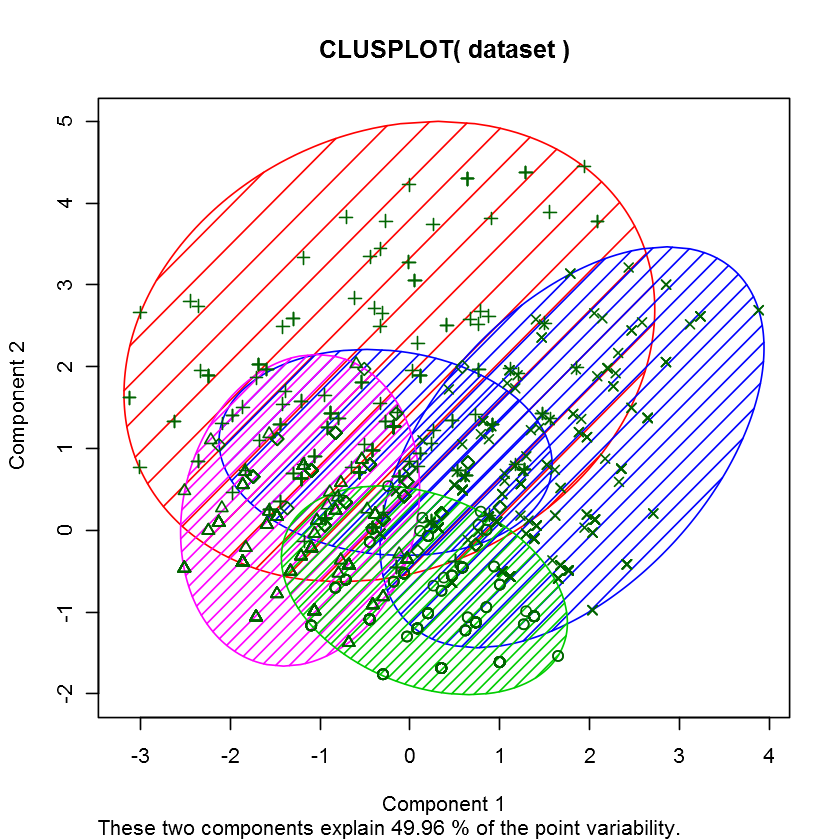

In [404]:
clusplot(dataset,k$cluster,color=TRUE,shade=TRUE,labels=1,lines=0)

In [405]:
k <-kmeans(dataset[,], centers=3) 
k$centers 
table(k$cluster)

,age,sex,race,party,emplnw
1,2.572562,1.426304,1.495465,2.170068,1.173469
2,2.593496,1.609756,1.894309,2.268293,4.528455
3,4.003591,1.570916,1.123878,2.025135,2.973070



  1   2   3 
882 246 557 

#### Cluster Analysis: 
#### Cluster 1:
People with age between 30-50 based on the age value inclined towards male who are either white or black or african american support democrat party and are more likely to be employed full-time.
#### Cluster 2:
People with age between 30-50 slightly inclined towards female who are black or african mostly tend to support  Democratic party and are Retired from work.
#### Cluster 3: 
People with age between 60-80 equally likely to be male or female who are white who support democrat party are either employed partly or not employed for work.


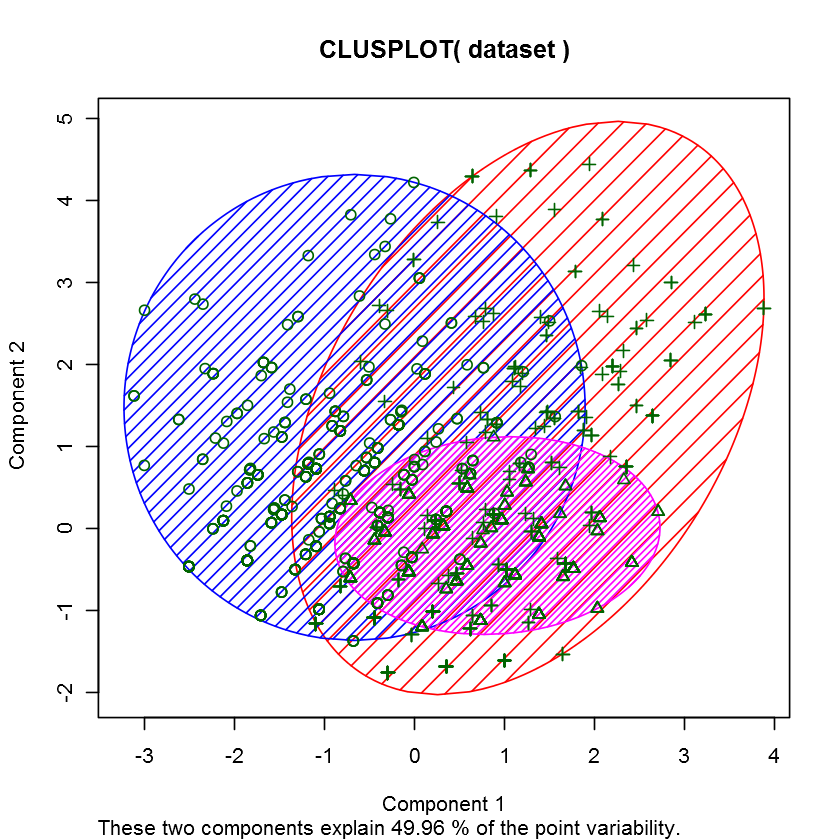

In [412]:
clusplot(dataset,kmeans(dataset,3)$cluster,color=TRUE,shade=TRUE,labels=1,lines=0)

#### Comparison Between k=3 and k=5
1. In k=5 we get more clusters thus more knowledge can be gained as more categories of user data (i.e. clusters) is available.
2. In k=3 less number of clusters lead to much more ambigous data or less knowledgeable data generated.
3. 5 clusters give better data analysis than 3 clusters.

#### Removing Outliers 

In [406]:
top.n.custs <- function (data,cols,n=5) { #Requires some data frame and the top N to remove
idx.to.remove <-integer(0) #Initialize a vector to hold customers being removed
for (c in cols){ # For every column in the data we passed to this function
col.order <-order(data[,c],decreasing=T) #Sort column "c" in descending order (bigger on top)
#Order returns the sorted index (e.g. row 15, 3, 7, 1, ...) rather than the actual values sorted.
idx <-head(col.order, n) #Take the first n of the sorted column C to
idx.to.remove <-union(idx.to.remove,idx) #Combine and de-duplicate the row ids that need to be removed
}
return(idx.to.remove) #Return the indexes of customers to be removed
}
top.custs <-top.n.custs(dataset,cols=c("sex","race","party","emplnw"),n=5)
length(top.custs) #How Many Customers to be Removed?
#dataset[top.custs,] #Examine the customers
dataset_new<-dataset[-c(top.custs),] #Remove the Customers

[1] 18

#### New Dataset without outliers

In [407]:
dataset_new

,age,sex,race,party,emplnw
8,4,1,1,1,3
9,4,1,1,2,3
11,5,2,1,1,3
12,4,2,1,1,3
14,4,2,1,2,3
15,3,2,1,3,1
16,3,2,1,1,1
17,4,1,1,3,3
18,5,1,2,2,3
19,4,2,1,2,3


#### Performing Kmeans on new Dataset and comparing with old Dataset

In [408]:
kmeans(dataset_new,3) #With removing outliers
kmeans(dataset2,3) #Without removing outliers

K-means clustering with 3 clusters of sizes 746, 807, 114

Cluster means:
       age      sex     race    party   emplnw
1 3.624665 1.577748 1.150134 2.076408 3.386059
2 2.593556 1.432466 1.192069 2.161090 1.159851
3 2.464912 1.473684 4.780702 2.333333 2.403509

Clustering vector:
   8    9   11   12   14   15   16   17   18   19   20   21   22   23   24   25 
   1    1    1    1    1    2    2    1    1    1    2    3    1    1    2    1 
  26   27   29   30   31   32   33   34   35   36   37   38   39   40   42   43 
   1    1    1    2    1    1    2    2    1    2    1    1    1    1    1    1 
  44   45   48   49   50   51   52   53   54   55   56   57   58   60   61   63 
   2    1    1    2    2    2    1    1    1    2    1    2    2    2    1    1 
  64   66   67   68   70   71   72   73   74   75   76   77   79   80   82   83 
   1    1    1    1    1    1    2    1    1    1    1    2    1    1    1    2 
  84   85   86   87   88   89   90   92   93   94   96   97   98   99 

K-means clustering with 3 clusters of sizes 624, 558, 819

Cluster means:
       age      sex     race    party   emplnw
1 28.92468 1.445513 1.836538 2.721154 2.415064
2 75.34409 1.569892 1.482079 2.575269 4.068100
3 53.94017 1.507937 1.649573 2.540904 2.152625

Clustering vector:
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
   3    3    2    1    2    2    2    2    2    2    2    2    3    2    3    3 
  17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32 
   2    2    2    3    1    2    2    3    2    1    1    2    2    3    2    3 
  33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48 
   1    1    3    3    2    3    3    3    2    2    2    1    2    1    2    2 
  49   50   51   52   53   54   55   56   57   58   59   60   61   62   63   64 
   3    2    1    2    3    2    1    3    3    3    1    3    2    2    2    2 
  65   66   67   68   69   70   71   72   73   74   75   76   77   78 

In [409]:
kmeans(dataset_new,5) #With removing outliers
kmeans(dataset2,5) #Without removing outliers

K-means clustering with 5 clusters of sizes 550, 360, 206, 460, 91

Cluster means:
       age      sex     race    party   emplnw
1 4.001818 1.570909 1.112727 2.020000 2.974545
2 2.883333 1.494444 1.169444 1.413889 1.122222
3 2.563107 1.601942 1.417476 2.228155 4.587379
4 2.350000 1.384783 1.245652 2.754348 1.221739
5 2.527473 1.450549 5.131868 2.340659 2.076923

Clustering vector:
   8    9   11   12   14   15   16   17   18   19   20   21   22   23   24   25 
   1    1    1    1    1    4    2    1    1    1    2    5    1    1    2    1 
  26   27   29   30   31   32   33   34   35   36   37   38   39   40   42   43 
   3    3    1    4    1    1    4    2    3    2    1    1    1    3    1    1 
  44   45   48   49   50   51   52   53   54   55   56   57   58   60   61   63 
   4    3    1    4    4    4    1    1    1    4    3    4    2    2    1    1 
  64   66   67   68   70   71   72   73   74   75   76   77   79   80   82   83 
   1    1    1    1    1    1    4    3    1    

K-means clustering with 5 clusters of sizes 428, 505, 396, 173, 499

Cluster means:
       age      sex     race    party   emplnw
1 69.38551 1.556075 1.357477 2.558411 3.602804
2 57.17228 1.500990 1.465347 2.475248 2.207921
3 43.83081 1.525253 1.979798 2.608586 2.093434
4 87.23699 1.578035 1.855491 2.682081 5.005780
5 26.55311 1.426854 1.799599 2.753507 2.380762

Clustering vector:
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
   3    2    4    3    1    1    1    1    1    1    4    1    2    1    3    3 
  17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32 
   1    4    1    2    5    4    4    2    1    3    3    4    1    2    1    2 
  33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48 
   5    5    3    3    1    2    2    2    1    4    1    5    1    5    4    1 
  49   50   51   52   53   54   55   56   57   58   59   60   61   62   63   64 
   2    1    3    1    2    1    3    2    2   

In [410]:
kmeans(dataset_new,7) #With removing outliers
kmeans(dataset2,7) #Without removing outliers

K-means clustering with 7 clusters of sizes 179, 531, 206, 190, 91, 280, 190

Cluster means:
       age      sex     race    party   emplnw
1 1.888268 1.284916 1.245810 3.000000 1.279330
2 4.001883 1.564972 1.112994 2.018832 3.009416
3 2.563107 1.601942 1.417476 2.228155 4.587379
4 3.142105 1.610526 1.068421 1.247368 1.131579
5 2.527473 1.450549 5.131868 2.340659 2.076923
6 3.242857 1.392857 1.225000 2.635714 1.132143
7 1.852632 1.484211 1.294737 1.594737 1.278947

Clustering vector:
   8    9   11   12   14   15   16   17   18   19   20   21   22   23   24   25 
   2    2    2    2    2    6    4    2    2    2    4    5    2    2    6    2 
  26   27   29   30   31   32   33   34   35   36   37   38   39   40   42   43 
   3    3    2    6    2    2    7    7    3    4    2    2    2    3    2    6 
  44   45   48   49   50   51   52   53   54   55   56   57   58   60   61   63 
   7    3    2    6    6    1    2    2    2    1    3    6    4    6    2    2 
  64   66   67   68   70 

K-means clustering with 7 clusters of sizes 271, 10, 354, 469, 449, 62, 386

Cluster means:
       age      sex     race    party    emplnw
1 76.97417 1.594096 1.254613 2.394834  3.000000
2 67.70000 1.500000 3.000000 4.900000 98.700000
3 38.66667 1.480226 1.935028 2.624294  1.734463
4 64.14499 1.524520 1.443497 2.486141  2.637527
5 52.44766 1.510022 1.590200 2.556793  2.062361
6 95.62903 1.564516 2.709677 3.322581  2.419355
7 24.56218 1.430052 1.839378 2.769430  2.106218

Clustering vector:
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
   5    4    1    3    4    4    1    4    1    1    1    1    5    1    3    3 
  17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32 
   4    6    4    5    7    1    6    5    4    3    3    1    1    4    4    5 
  33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48 
   7    7    5    3    1    4    5    5    4    1    1    7    4    7    1    1 
  49   50   51   5

#### Observations: 
1. As we can see increasing k value - or number of clusters gives better results.
2. When outliers are removed, significant improvements in the results can also be seen.  

#### Comparing Cluster Plots:
1. Dataset With Outliers
2. Dataset Without Outliers

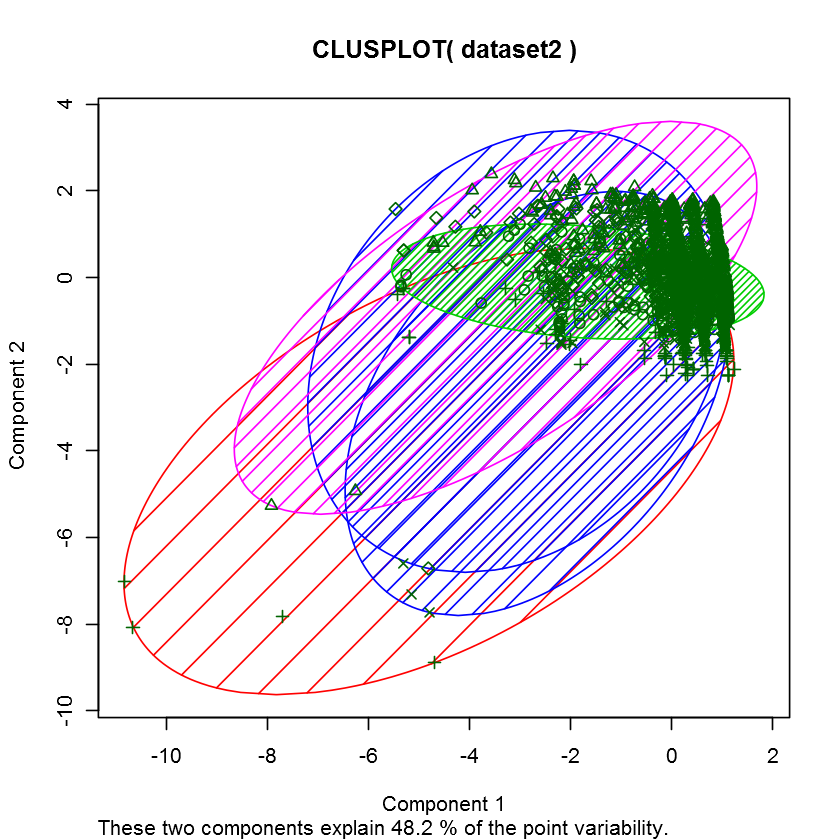

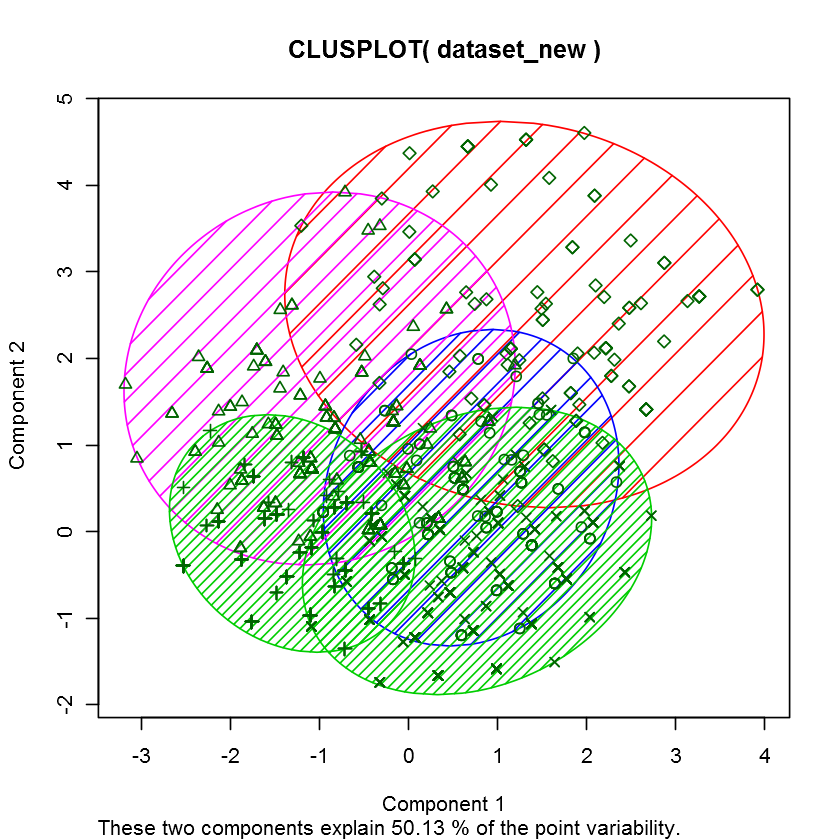

In [411]:
clusplot(dataset2,kmeans(dataset2,5)$cluster,color=TRUE,shade=TRUE,labels=1,lines=0)
clusplot(dataset_new,kmeans(dataset_new,5)$cluster,color=TRUE,shade=TRUE,labels=1,lines=0)